# Wine Quality Prediction
### Using Linear Regression Model

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
# Import Wine Quality Dataset
df = pd.read_csv(r"C:\Users\aksha\Desktop\Internship\Bharat Intern\Wine Quality Prediction\winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Preprocessing

In [4]:
df.shape

(1599, 12)

In [5]:
# Check DataType and Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Description of DataSet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
# Find any Null values available in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Check Duplicated Values
df.duplicated().sum()

240

In [9]:
# Using drop_duplicates drop 240 duplicated values.
df.drop_duplicates(inplace=True)

In [10]:
# Then Remain 1359 Rows
df.shape

(1359, 12)

In [11]:
# Check Unique No of Wine Quality
df['quality'].value_counts().sort_index()

3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

In [12]:
# Correlation between all features
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


# Visualization

<AxesSubplot:>

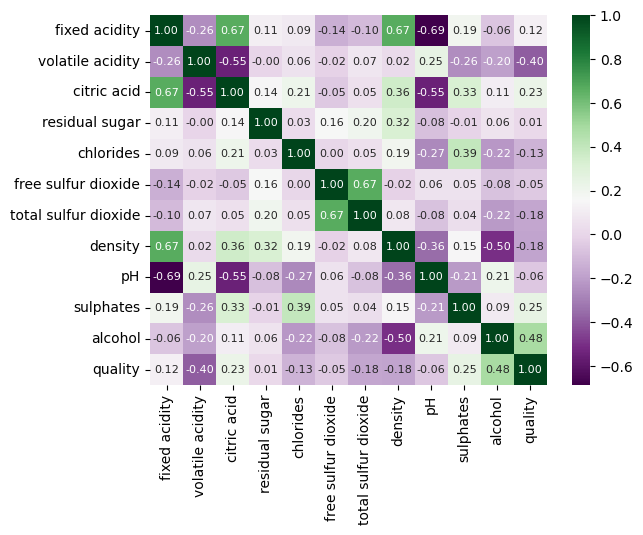

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='PRGn', fmt='.2f',annot_kws={"size":8})

Text(0.5, 1.0, 'Count of Wine Quality')

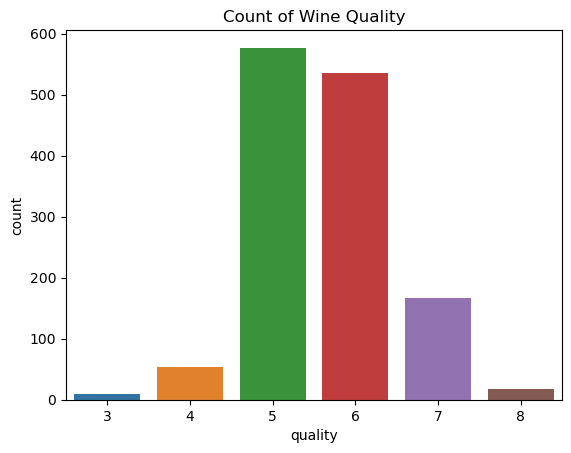

In [14]:
sns.countplot(data=df, x='quality')
plt.title("Count of Wine Quality")

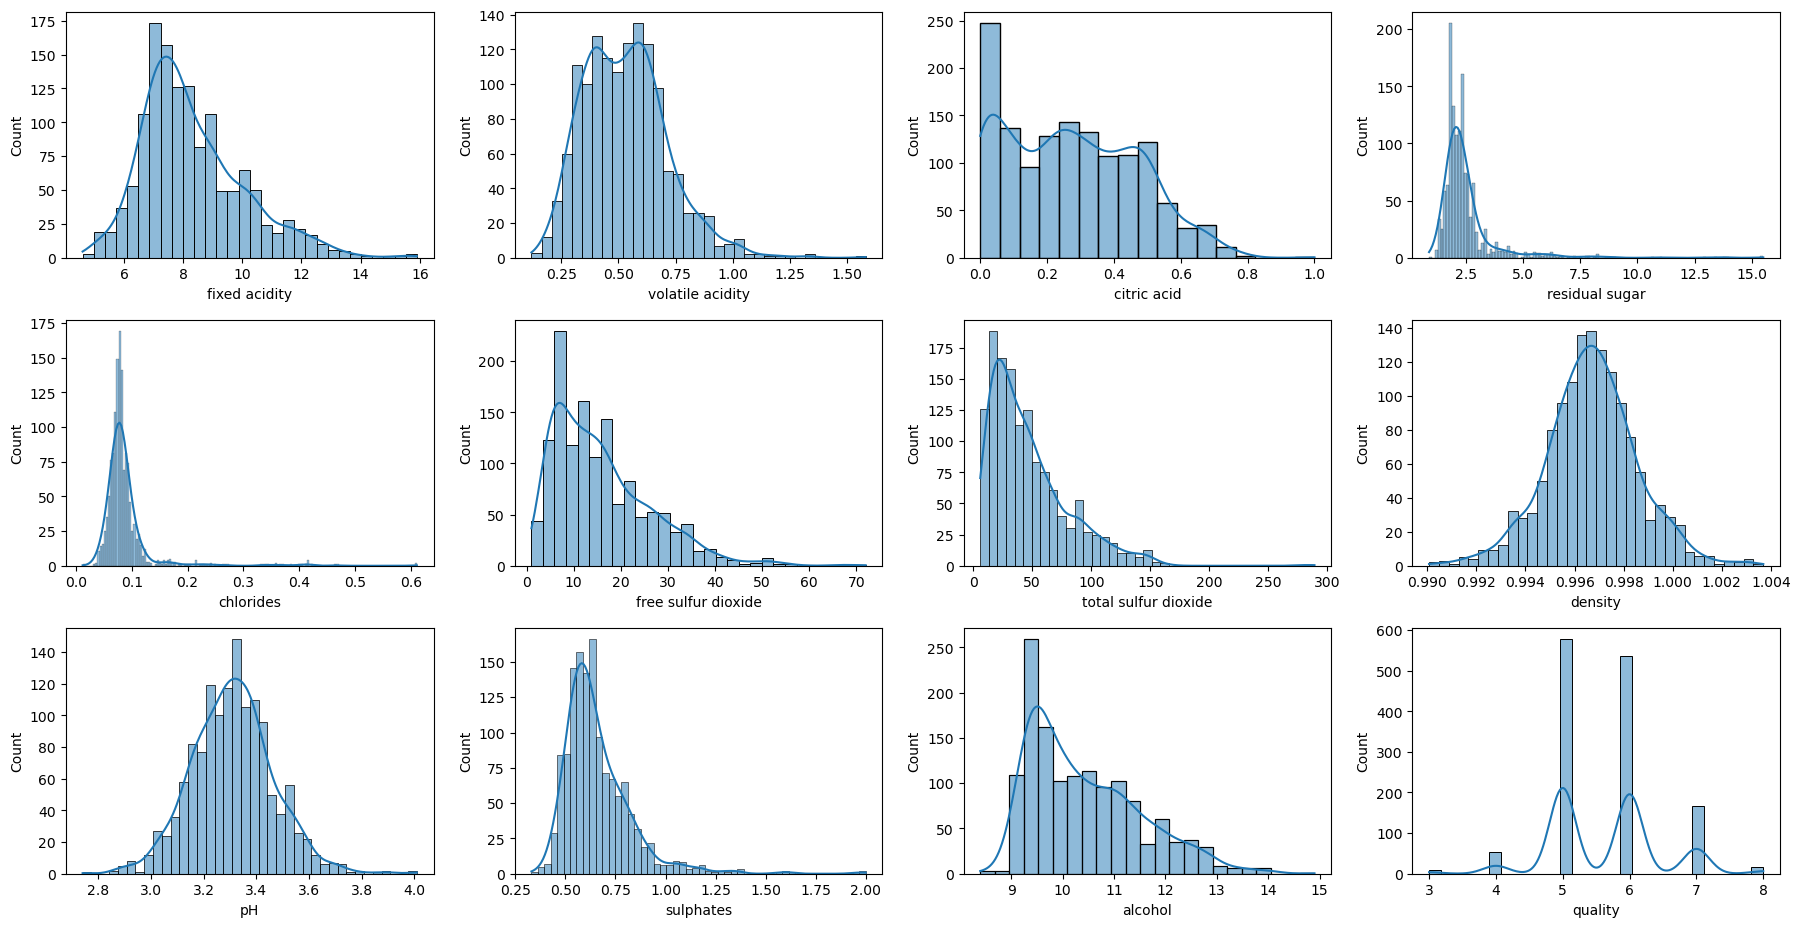

In [15]:
plt.figure(figsize=(18,12))
plt.subplot(4,4,1)
sns.histplot(data=df, x='fixed acidity', kde=True)

plt.subplot(4,4,2)
sns.histplot(data=df, x='volatile acidity', kde=True)

plt.subplot(4,4,3)
sns.histplot(data=df, x='citric acid', kde=True)

plt.subplot(4,4,4)
sns.histplot(data=df, x='residual sugar', kde=True)

plt.subplot(4,4,5)
sns.histplot(data=df, x='chlorides', kde=True)

plt.subplot(4,4,6)
sns.histplot(data=df, x='free sulfur dioxide', kde=True)

plt.subplot(4,4,7)
sns.histplot(data=df, x='total sulfur dioxide', kde=True)

plt.subplot(4,4,8)
sns.histplot(data=df, x='density', kde=True)

plt.subplot(4,4,9)
sns.histplot(data=df, x='pH', kde=True)

plt.subplot(4,4,10)
sns.histplot(data=df, x='sulphates', kde=True)

plt.subplot(4,4,11)
sns.histplot(data=df, x='alcohol', kde=True)

plt.subplot(4,4,12)
sns.histplot(data=df, x='quality', kde=True)

plt.tight_layout()

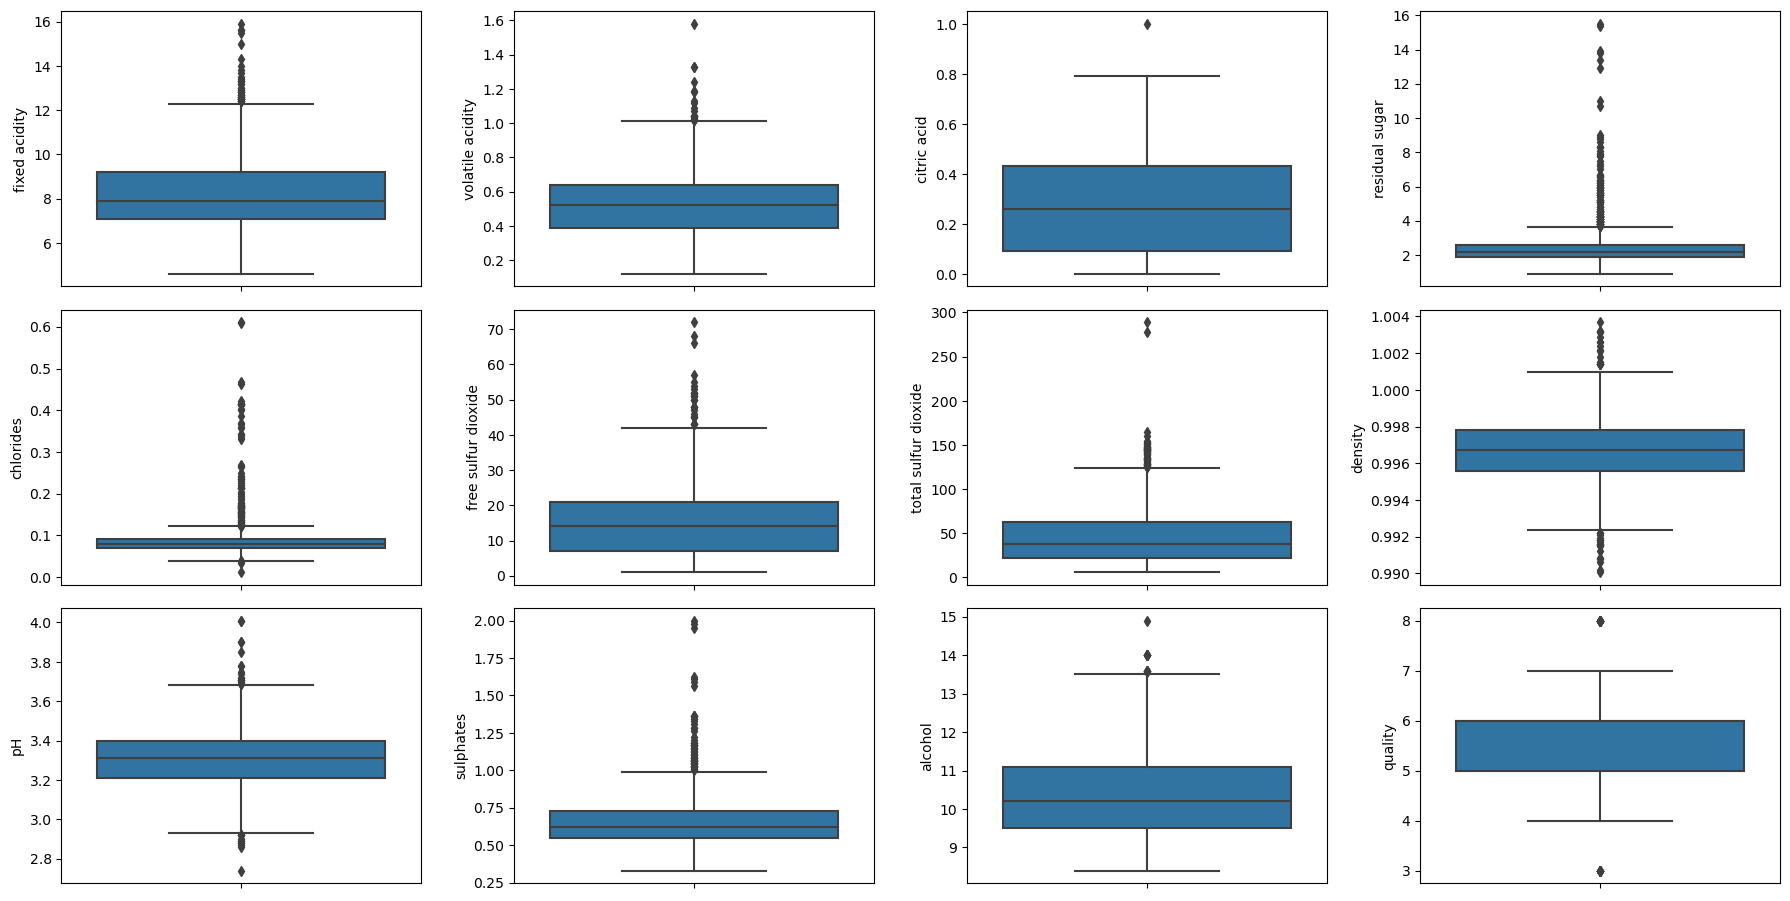

In [16]:
plt.figure(figsize=(18,12))
plt.subplot(4,4,1)
sns.boxplot(data=df, y='fixed acidity')

plt.subplot(4,4,2)
sns.boxplot(data=df, y='volatile acidity')

plt.subplot(4,4,3)
sns.boxplot(data=df, y='citric acid')

plt.subplot(4,4,4)
sns.boxplot(data=df, y='residual sugar')

plt.subplot(4,4,5)
sns.boxplot(data=df, y='chlorides')

plt.subplot(4,4,6)
sns.boxplot(data=df, y='free sulfur dioxide')

plt.subplot(4,4,7)
sns.boxplot(data=df, y='total sulfur dioxide')

plt.subplot(4,4,8)
sns.boxplot(data=df, y='density')

plt.subplot(4,4,9)
sns.boxplot(data=df, y='pH')

plt.subplot(4,4,10)
sns.boxplot(data=df, y='sulphates')

plt.subplot(4,4,11)
sns.boxplot(data=df, y='alcohol')

plt.subplot(4,4,12)
sns.boxplot(data=df, y='quality')

plt.tight_layout()

Text(0, 0.5, 'Total Sulfur Dioxide')

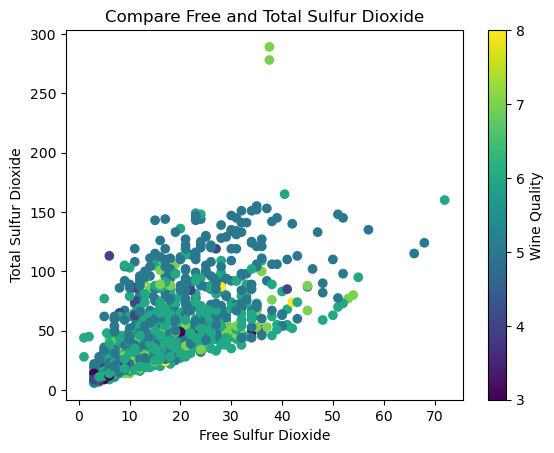

In [17]:
plt.scatter(x=df['free sulfur dioxide'], y=df['total sulfur dioxide'], c=df['quality'])
plt.colorbar(label='Wine Quality')
plt.title("Compare Free and Total Sulfur Dioxide")
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')

Text(0, 0.5, 'Fixed Acidity')

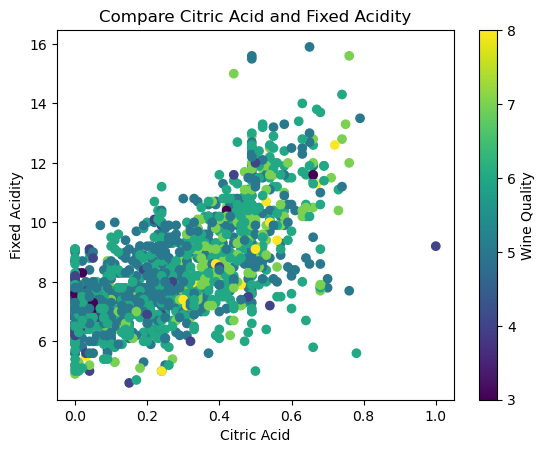

In [18]:
plt.scatter(x=df['citric acid'], y=df['fixed acidity'], c=df['quality'])
plt.colorbar(label='Wine Quality')
plt.title("Compare Citric Acid and Fixed Acidity")
plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')

# Model Preprocessing

In [19]:
# Create Independent and Dependent Varaible.
X = df.drop(['quality'], axis=1)
y = df['quality']

In [21]:
# Standard Scaling for all data transform in one scale.
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
# Split Dataset into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)

# Model Building

In [23]:
# Build Linear Regression Model
model = LinearRegression()
fit = model.fit(X_train, y_train)
y_pred = fit.predict(X_test)
t_pred = fit.predict(X_train)

In [24]:
# Check Error Rate
print("Training Error:",mean_squared_error(y_train, t_pred))
print("Testing Error:" ,mean_squared_error(y_test, y_pred))
print('\n')
print("Training Error:",mean_absolute_percentage_error(y_train, t_pred))
print("Testing Error:" ,mean_absolute_percentage_error(y_test, y_pred))

Training Error: 0.4426134561958084
Testing Error: 0.4066700352371035


Training Error: 0.09447682554819385
Testing Error: 0.09266953160149694
